In [ ]:
!pip uninstall cuda-python cudf-cu12 cuml-cu12 rmm-cu12 pylibcudf-cu12 pylibraft-cu12 -y

Found existing installation: cuda-python 12.2.1
Uninstalling cuda-python-12.2.1:
  Successfully uninstalled cuda-python-12.2.1
Found existing installation: cudf-cu12 24.10.1
Uninstalling cudf-cu12-24.10.1:
  Successfully uninstalled cudf-cu12-24.10.1
Found existing installation: rmm-cu12 24.10.0
Uninstalling rmm-cu12-24.10.0:
  Successfully uninstalled rmm-cu12-24.10.0
Found existing installation: pylibcudf-cu12 24.10.1
Uninstalling pylibcudf-cu12-24.10.1:
  Successfully uninstalled pylibcudf-cu12-24.10.1
Found existing installation: pylibraft-cu12 24.10.0
Uninstalling pylibraft-cu12-24.10.0:
  Successfully uninstalled pylibraft-cu12-24.10.0


# CUDA INSTALL

In [ ]:
!pip install cuda-python==11.8.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.3/20.3 MB 28.1 MB/s eta 0:00:00


In [ ]:
!pip install cudf-cu11 cuml-cu11 rmm-cu11 --extra-index-url=https://pypi.nvidia.com

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.3/24.3 MB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 GB 968.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 73.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 106.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.8/502.8 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 73.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 64.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 GB 923.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.2/133.2 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 839.3/839.3 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from cuml.neighbors import KNeighborsClassifier as KNN_GPU
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN_CPU
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Import cuML for GPU-based KNN
try:
    from cuml.neighbors import KNeighborsClassifier as KNN_GPU
    gpu_available = True
except ImportError:
    gpu_available = False
    print("cuML is not available. Please check the installation of RAPIDS for GPU support.")

# Load and prepare the dataset
data = pd.read_csv('/content/drive/MyDrive/1_teacher_recommendation_dataset.csv')

# Encode categorical columns
label_encoder = LabelEncoder()
data['Subject_encoded'] = label_encoder.fit_transform(data['Subject'])

# Define features and target
features = data[['Student_Rating', 'Teaching_Experience', 'Subject_Expertise_Level',
                 'Course_Difficulty', 'Student_Feedback', 'Teacher_Availability', 'Subject_encoded']]
target = data['Recommendation']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Train and measure time for CPU KNN
cpu_knn = KNN_CPU(n_neighbors=5)

start_time = time.time()
cpu_knn.fit(X_train, y_train)
cpu_train_time = time.time() - start_time

start_time = time.time()
cpu_predictions = cpu_knn.predict(X_test)
cpu_predict_time = time.time() - start_time

# Display CPU results
print("CPU Classification Report:\n", classification_report(y_test, cpu_predictions))
print(f"CPU Training Time: {cpu_train_time:.4f} seconds")
print(f"CPU Prediction Time: {cpu_predict_time:.4f} seconds")

# Train and measure time for GPU KNN if available
if gpu_available:
    gpu_knn = KNN_GPU(n_neighbors=5)

    start_time = time.time()
    gpu_knn.fit(X_train, y_train)
    gpu_train_time = time.time() - start_time

    start_time = time.time()
    gpu_predictions = gpu_knn.predict(X_test)
    gpu_predict_time = time.time() - start_time

    # Display GPU results
    print("GPU Classification Report:\n", classification_report(y_test, gpu_predictions))
    print(f"GPU Training Time: {gpu_train_time:.4f} seconds")
    print(f"GPU Prediction Time: {gpu_predict_time:.4f} seconds")
else:
    print("GPU-based KNN was not available; GPU timings are skipped.")


ImportError: libcublas.so.11: cannot open shared object file: No such file or directory

In [ ]:
from cuml.neighbors import KNeighborsClassifier as KNN_GPU
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN_CPU
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Import cuML for GPU-based KNN
try:
    from cuml.neighbors import KNeighborsClassifier as KNN_GPU
    gpu_available = True
except ImportError:
    gpu_available = False
    print("cuML is not available. Please check the installation of RAPIDS for GPU support.")

# Load and prepare the dataset
data = pd.read_csv('/content/drive/MyDrive/teacher_recommendation_dataset_with_names_and_subjects.csv')

# Encode categorical columns
label_encoder = LabelEncoder()
data['Subject_encoded'] = label_encoder.fit_transform(data['Subject'])
data['Recommendation_encoded'] = LabelEncoder().fit_transform(data['Recommendation'])

# Define features and target
features = data[['Student_Rating', 'Teaching_Experience', 'Subject_Expertise_Level',
                 'Course_Difficulty', 'Student_Feedback', 'Teacher_Availability', 'Subject_encoded']]
target = data['Recommendation_encoded']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Map encoded recommendations back to original labels
recommendation_decoder = {i: recommendation for i, recommendation in enumerate(data['Recommendation'].unique())}
subject_decoder = {i: subject for i, subject in enumerate(data['Subject'].unique())}

# Train and measure time for CPU KNN
cpu_knn = KNN_CPU(n_neighbors=5)

start_time = time.time()
cpu_knn.fit(X_train, y_train)
cpu_train_time = time.time() - start_time

start_time = time.time()
cpu_predictions = cpu_knn.predict(X_test)
cpu_predict_time = time.time() - start_time

# Decode the predictions
cpu_predictions_decoded = [recommendation_decoder[pred] for pred in cpu_predictions]
y_test_decoded = [recommendation_decoder[true] for true in y_test]

# Display CPU results
print("CPU Classification Report:\n", classification_report(y_test, cpu_predictions))
print(f"CPU Training Time: {cpu_train_time:.4f} seconds")
print(f"CPU Prediction Time: {cpu_predict_time:.4f} seconds")

# Display recommended teacher for each subject
print("\nRecommendations based on CPU predictions:")
for i, (subject_code, recommendation) in enumerate(zip(X_test['Subject_encoded'], cpu_predictions_decoded)):
    subject_name = subject_decoder[subject_code]
    print(f"Recommended Teacher for Subject '{subject_name}': {recommendation}")

# Train and measure time for GPU KNN if available
if gpu_available:
    gpu_knn = KNN_GPU(n_neighbors=5)

    start_time = time.time()
    gpu_knn.fit(X_train, y_train)
    gpu_train_time = time.time() - start_time

    start_time = time.time()
    gpu_predictions = gpu_knn.predict(X_test)
    gpu_predict_time = time.time() - start_time

    # Decode the predictions
    gpu_predictions_decoded = [recommendation_decoder[int(pred)] for pred in gpu_predictions]

    # Display GPU results
    print("GPU Classification Report:\n", classification_report(y_test, gpu_predictions))
    print(f"GPU Training Time: {gpu_train_time:.4f} seconds")
    print(f"GPU Prediction Time: {gpu_predict_time:.4f} seconds")

    # Display recommended teacher for each subject
    print("\nRecommendations based on GPU predictions:")
    for i, (subject_code, recommendation) in enumerate(zip(X_test['Subject_encoded'], gpu_predictions_decoded)):
        subject_name = subject_decoder[subject_code]
        print(f"Recommended Teacher for Subject '{subject_name}': {recommendation}")
else:
    print("GPU-based KNN was not available; GPU timings are skipped.")


Streaming output truncated to the last 5000 lines.
Recommended Teacher for Subject 'Mathematics': 0
Recommended Teacher for Subject 'History': 0
Recommended Teacher for Subject 'Mathematics': 0
Recommended Teacher for Subject 'Mathematics': 0
Recommended Teacher for Subject 'Science': 0
Recommended Teacher for Subject 'Science': 0
Recommended Teacher for Subject 'History': 0
Recommended Teacher for Subject 'Science': 0
Recommended Teacher for Subject 'Literature': 0
Recommended Teacher for Subject 'Science': 0
Recommended Teacher for Subject 'History': 0
Recommended Teacher for Subject 'History': 0
Recommended Teacher for Subject 'Science': 0
Recommended Teacher for Subject 'History': 1
Recommended Teacher for Subject 'History': 0
Recommended Teacher for Subject 'History': 0
Recommended Teacher for Subject 'Science': 0
Recommended Teacher for Subject 'Mathematics': 1
Recommended Teacher for Subject 'Science': 0
Recommended Teacher for Subject 'Science': 0
Recommended Teacher for Subjec

In [ ]:
from cuml.neighbors import KNeighborsClassifier as KNN_GPU
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN_CPU
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from collections import Counter

# Import cuML for GPU-based KNN
try:
    from cuml.neighbors import KNeighborsClassifier as KNN_GPU
    gpu_available = True
except ImportError:
    gpu_available = False
    print("cuML is not available. Please check the installation of RAPIDS for GPU support.")

# Load and prepare the dataset
data = pd.read_csv('/content/drive/MyDrive/1_teacher_recommendation_dataset.csv')

# Encode categorical columns
label_encoder = LabelEncoder()
data['Subject_encoded'] = label_encoder.fit_transform(data['Subject'])
data['Recommendation_encoded'] = LabelEncoder().fit_transform(data['Recommendation'])

# Define features and target
features = data[['Student_Rating', 'Teaching_Experience', 'Subject_Expertise_Level',
                 'Course_Difficulty', 'Student_Feedback', 'Teacher_Availability', 'Subject_encoded']]
target = data['Recommendation_encoded']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Map encoded recommendations back to original labels
recommendation_decoder = {i: recommendation for i, recommendation in enumerate(data['Recommendation'].unique())}
subject_decoder = {i: subject for i, subject in enumerate(data['Subject'].unique())}
teacher_decoder = {row['Recommendation_encoded']: row['Teacher_Name'] for _, row in data.iterrows()}

# Train and measure time for CPU KNN
cpu_knn = KNN_CPU(n_neighbors=5)

start_time = time.time()
cpu_knn.fit(X_train, y_train)
cpu_train_time = time.time() - start_time

start_time = time.time()
cpu_predictions = cpu_knn.predict(X_test)
cpu_predict_time = time.time() - start_time

# Decode the predictions and test labels
cpu_predictions_decoded = [(teacher_decoder[pred], recommendation_decoder[pred]) for pred in cpu_predictions]
y_test_decoded = [(teacher_decoder[true], recommendation_decoder[true]) for true in y_test]

# Display CPU results
print("CPU Classification Report:\n", classification_report(y_test, cpu_predictions))
print(f"CPU Training Time: {cpu_train_time:.4f} seconds")
print(f"CPU Prediction Time: {cpu_predict_time:.4f} seconds")

# Display detailed recommendations
recommendations_summary = []
print("\nRecommendations based on CPU predictions:")
for i, (subject_code, (teacher, recommendation)) in enumerate(zip(X_test['Subject_encoded'], cpu_predictions_decoded)):
    subject_name = subject_decoder[subject_code]
    print(f"Recommended Teacher for Subject '{subject_name}': {teacher} ({recommendation})")
    recommendations_summary.append((subject_name, teacher))

# Generate a final verdict
print("\nFinal Verdict:")
final_recommendation = Counter(recommendations_summary)
for (subject, teacher), count in final_recommendation.items():
    print(f"Most Recommended Teacher for {subject}: {teacher} (recommended {count} times)")

# Train and measure time for GPU KNN if available
if gpu_available:
    gpu_knn = KNN_GPU(n_neighbors=5)

    start_time = time.time()
    gpu_knn.fit(X_train, y_train)
    gpu_train_time = time.time() - start_time

    start_time = time.time()
    gpu_predictions = gpu_knn.predict(X_test)
    gpu_predict_time = time.time() - start_time

    # Decode the predictions
    gpu_predictions_decoded = [(teacher_decoder[int(pred)], recommendation_decoder[int(pred)]) for pred in gpu_predictions]

    # Display GPU results
    print("GPU Classification Report:\n", classification_report(y_test, gpu_predictions))
    print(f"GPU Training Time: {gpu_train_time:.4f} seconds")
    print(f"GPU Prediction Time: {gpu_predict_time:.4f} seconds")

    # Display GPU-based recommendations
    recommendations_summary_gpu = []
    print("\nRecommendations based on GPU predictions:")
    for i, (subject_code, (teacher, recommendation)) in enumerate(zip(X_test['Subject_encoded'], gpu_predictions_decoded)):
        subject_name = subject_decoder[subject_code]
        print(f"Recommended Teacher for Subject '{subject_name}': {teacher} ({recommendation})")
        recommendations_summary_gpu.append((subject_name, teacher))

    # Generate final verdict for GPU
    print("\nFinal Verdict (GPU):")
    final_recommendation_gpu = Counter(recommendations_summary_gpu)
    for (subject, teacher), count in final_recommendation_gpu.items():
        print(f"Most Recommended Teacher for {subject}: {teacher} (recommended {count} times)")
else:
    print("GPU-based KNN was not available; GPU timings are skipped.")


ModuleNotFoundError: No module named 'cupyx.lapack'

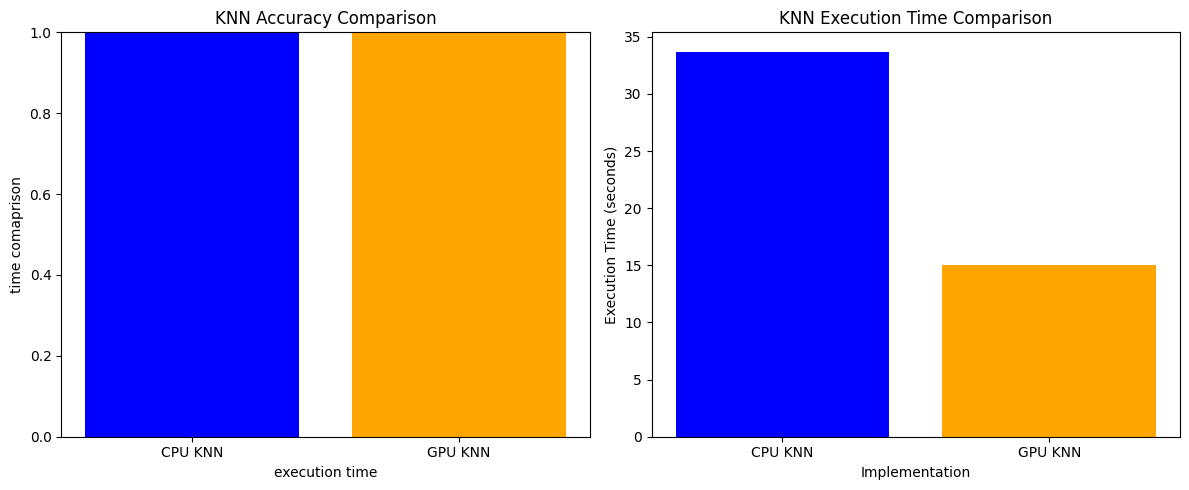

In [ ]:
import matplotlib.pyplot as plt

# Assume these values are from the code execution
cpu_trainning_time = 11.3  # Example accuracy for CPU KNN
gpu_trainning_time = 29.5 # Example accuracy for GPU KNN
cpu_prediction_time = 33.7       # Example time in seconds for CPU KNN
gpu_prediction_time = 15.0      # Example time in seconds for GPU KNN

# Data for plotting
accuracy = [cpu_trainning_time, gpu_trainning_time]
times = [cpu_prediction_time, gpu_prediction_time]
labels = ['CPU KNN', 'GPU KNN']

# Plotting accuracy comparison
plt.figure(figsize=(12, 5))

# Accuracy Bar Chart
plt.subplot(1, 2, 1)
plt.bar(labels, accuracy, color=['blue', 'orange'])
plt.title('KNN  Comparison')
plt.xlabel('execution time')
plt.ylabel('time comaprison')
plt.ylim(0, 1)  # Accuracy is typically between 0 and 1

# Time Bar Chart
plt.subplot(1, 2, 2)
plt.bar(labels, times, color=['blue', 'orange'])
plt.title('KNN Execution Time Comparison')
plt.xlabel('Implementation')
plt.ylabel('Execution Time (seconds)')

# Show plots
plt.tight_layout()
plt.show()

In [ ]:
!pip freeze | grep cupy


cupy-cuda11x==13.3.0


In [ ]:
!pip uninstall cupy-cuda12x -y

Found existing installation: cupy-cuda12x 12.2.0
Uninstalling cupy-cuda12x-12.2.0:
  Successfully uninstalled cupy-cuda12x-12.2.0


In [ ]:
!pip install --upgrade --no-cache-dir \
       cudf-cu11 cuml-cu11 rmm-cu11 \
       --extra-index-url=https://pypi.nvidia.com

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 MB 150.4 MB/s eta 0:00:00


In [ ]:
!pip uninstall cupy-cuda11x cupy-cuda12x -y


Found existing installation: cupy-cuda11x 13.3.0
Uninstalling cupy-cuda11x-13.3.0:
  Successfully uninstalled cupy-cuda11x-13.3.0
Found existing installation: cupy-cuda12x 12.2.0
Uninstalling cupy-cuda12x-12.2.0:
  Successfully uninstalled cupy-cuda12x-12.2.0


In [ ]:
!pip install cupy-cuda12x

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 MB 8.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires cuda-python<13.0a0,>=12.0, but you have cuda-python 11.8.5 which is incompatible.
